# 12. 파이썬으로 이미지 파일 다루기

## 12-1. 들어가며
- 컴퓨터에서 이미지가 표현되는 방식을 이해한다.
- Pillow와 OpenCV로 Python에서 이미지 파일을 열고 정보를 추출한다.
- CIFAR-100에서 히스토그램을 기반으로 유사한 이미지를 골라낸다.

**데이터**
- [pillow_practice.png](https://d3s0tskafalll9.cloudfront.net/media/documents/pillow_practice.png)
- [cifar-100-python.tar.gz](https://d3s0tskafalll9.cloudfront.net/media/documents/cifar-100-python.tar.gz)
- [The CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

## 12-2. 디지털 이미지
- **화소(pixel, picture element)**: 색상을 가지는 점 하나. 각 화소는 **RGB** 세 개의 단일 색의 강도를 각각 조절하여 색상을 표현한다.
- **래스터(raster)**, **비트맵(bitmap)** 방식: 각 점 하나하나의 색상 값을 저장하는 방식. 보통 한 점마다 각 색상별로 8비트를 사용하여 0~255 사이의 값으로 해당 색의 감도를 표시한다.
- **벡터(vector)**: 벡터 방식의 이미지는 상대적인 점과 선의 위치 방정식으로 기록해 두었다가, 확대 및 축소에 따라 각 화소에 어떻게 표현될지를 재계산하기 때문에 꺠짐이 없다. 글꼴들이 주로 벡터 방식이다.
- **HSV**: Hue, Saturation, Value
- **CMYK**: Cyan, Magneta, Yello, Black

이렇게 색을 표현하느 다양한 방식을 각각 **컬러 스페이스(color space)**라고 하며, 각 컬러 스페이스를 구성하는 단일 축(RGB에서 각각 R, G, B)을 **채널(channel)**이라고 한다.

JPEG 이미지 형식의 경우 근처에 있는 화소들을 묶어, 비슷한 색들을 뭉뚱그리는 방식으로 이미지를 압축한다. 이러한 방식에는 색상 정보의 손실이 있어, 정할 때 압축률을 높이거나 여러 번 다시 저장하는 등 재압축이 일어나게 될 경우 *디지털 풍화*라고 불리는 색상이 지저분해지는 현상을 볼 수 있게 된다.

스크린샷 등에 많이 사용되는 PNG 이미지 형식의 경우 색상의 손실 없이 이미지를 압축하는데, 이미지에 사용된 색상을 미리 정의해두고 그를 참조하는 팔레트 방식을 사용할 수 있기에, 사용된 색상이 적은 단순한 이미지의 경우 동일한 해상도의 JPEG 파일보다도 용량이 적을 수도 있지만, 사진과 같이 이미지에 사요된 색상이 많아지면 JPEG 파일보다 더 많은 용량을 차지하게 된다.



## 12-3. Pillow 사용법
**Pillow**는 파이썬의 이미지 처리 라이브러리이다. 2011년 이후로 개발이 중단된 PIL(Python Image Library)를 이어 받아 개발되고 있다.

결국 이미지는 **배열 형태의 데이터**이다. 

예를 들어 가로 세로 각 32픽셀에 RGB 세 가지 색상 채널이 있다면, Numpy로 [32, 32, 3] 차원의 배열을 생성하면 된다.

또한 데이터 타입을 `uint8`, 즉 각 값이 부호가 없는(`unsigned`) 8비트 정수(`integer`)가  되어 0~255(2의 8승 = 256) 사이의 값을 나타내도록 해야 한다.

- [Python에서 NumPy 배열을 PIL 이미지로 변환](https://www.delftstack.com/ko/howto/matplotlib/convert-a-numpy-array-to-pil-image-python/)

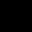

In [1]:
import numpy as np
from PIL import Image

data = np.zeros([32, 32, 3], dtype=np.uint8) # numpy 배열
image = Image.fromarray(data, 'RGB') # numpy 배열을 이미지로 변환해준다.
image

- `PIL.Image.fromarray()`를 통해 이미지 객체를 변환한다.
- 주피터 노트북이 아니라면 `.show()` 메서드를 통해 이미지를 출력할 수 있다.

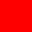

In [2]:
data[:, :] = [255, 0, 0] # red
image = Image.fromarray(data, 'RGB')
image

### 연습 문제

#### 1. 가로 세로 각 128 픽셀짜리 흰색 이미지를 만들어 화면에 표시해 봅시다.

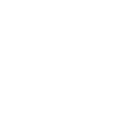

In [7]:
image_data = np.zeros([128, 128, 3], dtype=np.uint8) # 128x128
image_data[:, :] = [255, 255, 255]
# print(image_data)

image = Image.fromarray(image_data, 'RGB') # numpy 배열 -> image
image

#### 2. 연습용 이미지를 열어 width와 height를 출력하고, .save()를 이용하여 jpg 파일 포맷으로 저장해 봅시다.

- [파이썬[Python, Pillow] 이미지 불러오기 및 저장하기](https://appia.tistory.com/353)
- [Convert png to jpeg using Pillow](https://stackoverflow.com/questions/43258461/convert-png-to-jpeg-using-pillow)


In [8]:
from google.colab import files
file_upload = files.upload()

Saving pillow_practice.png to pillow_practice.png


(620, 465)
Width:  620
Height:  465


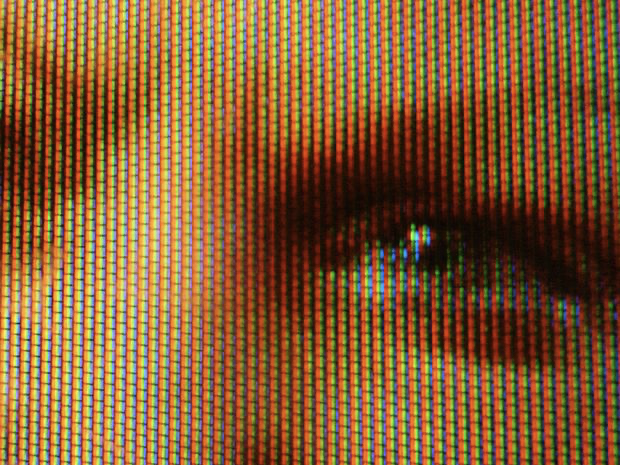

In [15]:
from PIL import Image
import os

# 연습용 파일 경로
# image_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/pillow_practice.png'
image_path = "pillow_practice.png"

# 이미지 열기
image = Image.open(image_path)


# image.show() # 이미지 출력

# width와 height 출력
image_size = image.size
print(image_size)
print("Width: ", image.width)
print("Height: ", image.height)
image

# JPG 파일 형식으로 저장해보기
# jpg_img = image.convert('RGB')
# save_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/'
# jpg_img.save(save_path + r'pillow_test.jpg')

#### 3. `.resize()`를 이용하여 이미지 크기를 100X200으로 변경하여 저장해봅시다.
- [파이썬[Python, Pillow] 이미지 크기 확인 및 변경하기, 비율로 변경하기](https://appia.tistory.com/365)

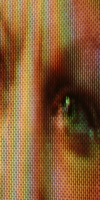

In [11]:
image_resized = image.resize((100, 200))

# image_resized.save(save_path + r'pillow_resized.png')
image_resized

### 4. `.crop()`을 이용하여 눈 부분만 잘라내어 저장해 봅시다.
- [파이썬[Python, Pillow] 이미지 자르기(Crop)](https://appia.tistory.com/367)

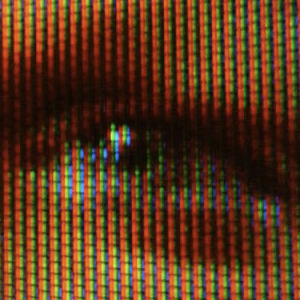

In [13]:
image_cropped = image.crop((300, 100, 600, 400))

# image_cropped.save(save_path + r'pillow_cropped.png')
image_cropped

## 12-4. Pillow를 활용한 데이터 전처리

### CIFAR-100 데이터를 받아 개별 이미지 파일로 추출하기


- [CIFAR-100 python version](https://www.cs.toronto.edu/~kriz/cifar.html)

**CIFAR-100 데이터셋**
2x32 화소 해상도의 이미지들이 100개 클래스 당 600장(각 학습용 500장, 테스트용 100장)하여 총 60,000장 있다.

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import os
import pickle
from PIL import Image

image_dir = "/content/drive/MyDrive/data/cifar-100-python"
train_file_path = os.path.join(image_dir, 'train')

with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')

print(type(train))

<class 'dict'>


In [24]:
print(train)

{b'filenames': [b'bos_taurus_s_000507.png', b'stegosaurus_s_000125.png', b'mcintosh_s_000643.png', b'altar_boy_s_001435.png', b'cichlid_s_000031.png', b'phone_s_002161.png', b'car_train_s_000043.png', b'beaker_s_000604.png', b'fog_s_000397.png', b'rogue_elephant_s_000421.png', b'computer_keyboard_s_000757.png', b'willow_tree_s_000645.png', b'sunflower_s_000549.png', b'palace_s_000759.png', b'adriatic_s_001782.png', b'computer_keyboard_s_001277.png', b'bike_s_000682.png', b'wolf_pup_s_001323.png', b'squirrel_s_002467.png', b'sea_s_000678.png', b'shrew_s_002233.png', b'pine_tree_s_000087.png', b'rose_s_000373.png', b'surveillance_system_s_000769.png', b'pine_s_001533.png', b'table_s_000897.png', b'opossum_s_001237.png', b'quercus_alba_s_000257.png', b'leopard_s_000414.png', b'possum_s_002195.png', b'bike_s_000127.png', b'balmoral_castle_s_000361.png', b'acer_saccharinum_s_000646.png', b'lapin_s_000916.png', b'chimp_s_001419.png', b'clock_s_002291.png', b'streetcar_s_000663.png', b'male_c

- 파일을 열어보니 `type`이 `dict`이다.
- `dict`의 key 값들이 `b`로 시작하는 `bytes`로 되어 있다.

In [25]:
type(train[b'filenames'])

list

- 파일명(`b'filenames'`)은 리스트로 되어 있다.

In [27]:
train[b'filenames'][0:5]

[b'bos_taurus_s_000507.png',
 b'stegosaurus_s_000125.png',
 b'mcintosh_s_000643.png',
 b'altar_boy_s_001435.png',
 b'cichlid_s_000031.png']

> Data: a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

In [28]:
train[b'data'][0:5]

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       [124, 131, 135, ..., 232, 236, 231],
       [ 43,  32,  87, ...,  60,  29,  37]], dtype=uint8)

In [29]:
train[b'data'][0].shape

(3072,)

- 3072라는 숫자는 RGB 3채널x1024(=32 * 32)씩 각 화소에 해당한다.
- 이 말은 이 Numpy 배열을 잘 `reshape`하면 이미지 파일 원본이 복구된다는 뜻이다.
- 데이터는 앞에서부터 1024바이트씩 RGB로 되어 있으므로 1024를 32x32로 채우는 3번의 `reshape`가 되어야 한다.

앞의 차원부터 데이터를 채우는 방식의 `reshape`를 위해 `np.shape`에는 `order`라는 인자가 있다. 이 값을 `F`로 주면 원하는 형태로 진행된다.

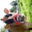

In [30]:
image_data = train[b'data'][0].reshape([32, 32, 3], order='F') # order 추가
image = Image.fromarray(image_data) # ndarray => image
image

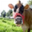

In [31]:
# 이미지의 x축 y축 뒤집기
image_data = image_data.swapaxes(0, 1)
image = Image.fromarray(image_data)
image

In [ ]:
import os
import pickle
from PIL import Image
import numpy
from tqdm import tqdm

image_dir = "/content/drive/MyDrive/data/cifar-100-python"
train_file_path = os.path.join(image_dir, 'train')

# image를 저장할 하위 폴더 생성
save_dir = "/content/drive/MyDrive/data/cifar-images"
if not os.path.exists(save_dir):
    os.mkdir(save_dir) # images 디렉토리 생성

# 32x32 이미지 파일 50000개를 생성한다
with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')
    for i in tqdm(range(len(train[b'filenames']))): # tqdm은 진행상황을 시각해준다
        filename = train[b'filenames'][i].decode()
        data = train[b'data'][i].reshape([32, 32, 3], order='F')
        image = Image.fromarray(data.swapaxes(0, 1))
        image.save(os.path.join(save_dir, filename))

## 12-5. OpenCV (1) 안녕, OpenCV
- [OpenCV 튜토리얼](https://docs.opencv.org/master/d6/d00/tutorial_py_root.html)
- [이미지에서 특정 색을 가진 영역만 추출하는 예제](https://docs.opencv.org/master/df/d9d/tutorial_py_colorspaces.html)

이미지는 결국 `[너비, 높이, 채널]` 형태를 가지는 배열이고, 컴퓨터 비전이란 결국 이러한 배열 형태의 데이털르 처리하는 것이 중요한 분야이다.

이미지의 내용 중 우리가 관심 있는 부분이 특정 색을 가지고 있다면, 이 정보를 통해 원하는 부분을 배경을 구분하고, 원하는 부분만 따로 떼어낼 수 있다.
이 예제에서는 이미지를 읽어 들이고, 파란색을 찾기 쉽도록 컬러스페이스를 BGR(RGB)에서 HSV로 변환한 뒤, 해당 색상과 맞는 영역만 표시하는 작업이 진행된다.

> OpenCV에서는 RGB가 아닌 BGR 순서를 사용한다.

- [Why do we convert RGB to HSV?
](https://www.quora.com/Why-do-we-convert-RGB-to-HSV)

### 연습 문제
아래 코드 전체 흐름 파악

In [36]:
from google.colab import files
file_upload = files.upload()

Saving cv_practice.png to cv_practice.png


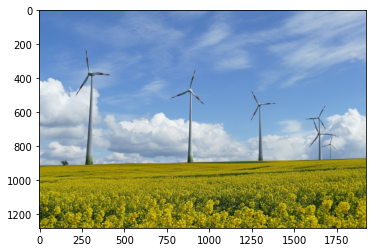

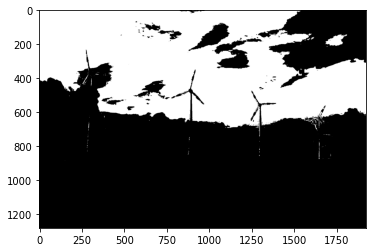

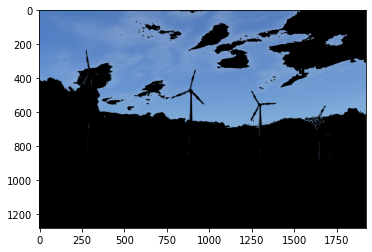

In [42]:
import os
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

image_path = "cv_practice.png"
img = cv.imread(image_path)

# Convert BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([130, 255, 255])

# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv.bitwise_and(img, img, mask=mask)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()

## 12-6. OpenCV (2) 톺아보기

```python
import cv2 as cv
import numpy as np
```
OpenCV는 pip으로 설치 시 `opencv-python`이라는 이름으로 설치해야 하는데, `import`할 때는 `cv2`라는 이름을 쓴다.

```python
img_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cv_practice.png'
img = cv.imread(img_path)
```
```python
img_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cv_practice.png'
img = cv.imread(img_path)
```
- [OpenCV - imread](https://docs.opencv.org/4.5.2/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56)

`imread` 함수는 파일로부터 이미지를 읽어와 반환해준다.

```python
# Convert BGR to HSV
hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
```
- [OpenCV: Color Space Conversions](https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab)

`cvtColor`는 컬러 스페이스 변환을 위한 함수이다. (RGB -> BGR)

```python
# define range of blue color in HSV
lower_blue = np.array([100,100,100])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, lower_blue, upper_blue)
```
숫자로 파란색 부붑늘 정의하고, 이 값을 기준으로 이미지에서 마스크를 생성해내는 과정이다. 마스크는 우리가 원하는 부분만 떼어낼 수 있도록 하는 역할이다.

위 코드에서 HSV 색 공간에서 색상(Hue) 값 110\~130 사이, 채도(Saturation) 및 명도(Value) 값 50~255 사이의 색들을 파란색이라고 정의하고 있다. 

이전에 `img`에서 `hsv`으로 변환한 것에 이 기준들을 적용하여 해당하는 픽셀들은 1, 그렇지 않은 픽셀들에는 0을 찍어 놓는 배열을 반환하는 것이 `cv.inRange()`의 역할이다.

```python
# Bitwise-AND mask and original image
res = cv.bitwise_and(frame,frame, mask= mask)
```
- [`cv.bitwise_and()`](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14)

이미지 두 장을 받아서 AND 비트 연산을 하는데 지금은 이 기능이 필요한 것이 아니니 두 장 다 같은 이미지 `frame`, `frame`을 넣어준다. 결국 동일한 이미지가 나오게 된다.

대신 중요한 `mask`를 같이 넣어줘서 해당 영역만 따오도록 한다. 따온 영역은 함수의 설명에 따라 `dst`가 주어지면 그 이미지 위에, 아니면 새로 빈 검정색 이미지 위에 이미지를 만들고 반환한다.

```python
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()
```
`plt`로 이미지를 띄우기 위해 BRG을 다시 RGB로 변환해준다.

각각 원본 이미지, 파란색 영역만 골라만 마스크, 그리고 이미지에 마스크를 적용한 결과가 나오게 된다.

plt를 이용하지 않고 cv로 이미지를 띄울 수도 있는데 `cv.imshow(res)`를 사용하면 된다.



## 12-7. 실습 : 비슷한 이미지 찾아내기

### CIFAR-100 이미지 중 비슷한 이미지 찾아내기
OpenCV에서 제공하는 기능 중에서 이미지에서 색상 히스토그램을 추출하고 이를 서로 비교하는 기능을 불러 사용해본다.
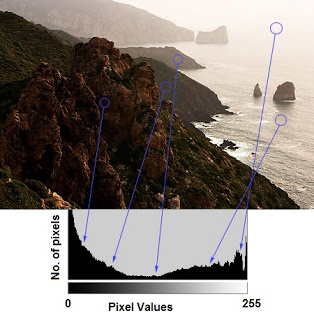

히스토그램을 통해 각 이미지의 색상 분포를 비교하여 서로 유사한 이미지를 판단하는 척도로 사용할 것이다.

RGB 각 채널별 분포를 사용하는데 0\~255 사이 각 값에 해당하는 픽셀 개수를 일일이 저장하면 계싼량이 많아지므로 4개 구간 0~63, 64~127, 128~191, 192~255)로 나누어 픽셀 수를 세준다.

```
pip install opencv-python matplotlib
```

In [43]:
from google.colab import files
file_upload = files.upload()

Saving adriatic_s_000757.png to adriatic_s_000757.png


In [1]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from PIL import Image

# 전처리 시 생성했던 디렉토리 구조
dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/'
train_file_path = os.path.join(dir_path, 'train')
images_dir_path = os.path.join(dir_path, 'cifar-images')

In [2]:
# 파일명을 인자로 받아 해당 이미지 파일과 히스토그램을 출력해주는 함수
def draw_color_histogram_from_image(file_name):
    image_path = os.path.join(images_dir_path, file_name)
    # 이미지 열기
    img = Image.open(image_path)
    cv_image = cv2.imread(image_path)
    
    # Image와 Histogram 그려보기
    f = plt.figure(figsize = (10, 3))
    im1 = f.add_subplot(1, 2, 1)
    im1.imshow(img)
    im1.set_title("Image")
    
    im2 = f.add_subplot(1, 2, 2)
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        # image에서 i번째 채널의 히스토그램을 뽑아서(0: blue, 1: green, 2: red)
        histr = cv2.calcHist([cv_image], [i], None, [256], [0, 256])
        im2.plot(histr, color = col) # 그래프를 그리 때 채널 색상과 맞춰서 그린다
    im2.set_title("Histogram")

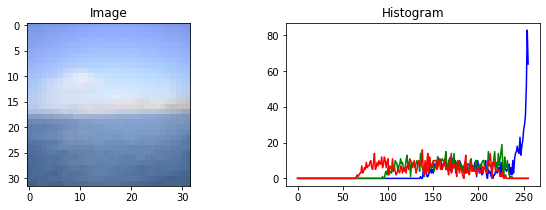

In [3]:
draw_color_histogram_from_image('adriatic_s_001807.png')

- ['adriatic_s_001807.png'](https://docs.opencv.org/master/d1/db7/tutorial_py_histogram_begins.html)

히스토그램을 보니 파란색이 확실히 튄다.

> 다음의 아이디어 도출 및 설계 과정이 앞으로 도움이 많이 될거 같아서 되도록 상세히 옮겨 적었다.

### STEP 1. 아이디어 개요

우리가 만들 결과물은 `histogram_search.py`라는 Python 파일이고, 이 파일은 이미지 파일 경로 하나를 명령줄에서 입력으로 받아, 검색 대상 이미지들 중 비슷한 이미지들을 골라 화면에 표시하는 기능을 수행한다.


이런 생각을 실제 동작하는 코드로 구체화하기 위해서 원하는 모든 부분이 명확해질 때까지 계속 스스로 질문하고, 직접 답을 찾는 방식으로 진행해본다.


우선 위에 정의한 기능에 있어서 가장 핵심적인 질문이라면, 아무래도 '비슷한 이미지'라는 개념을 어떻게 컴퓨터가 이해하도록 표현하느냐일 것이다. 이미지의 유사성을 정
의하고 측정하는 방법은 많겠지만, 위에서 배운 히스토그램을 이용하여 이미지를 서로 비교할 예정이다.

히스토그램을 만들어주는 함수 `cv2.calcHist()`와 마찬가지로, 히스토그램끼리의 유사성을 계산해주는 기능 역시 OpenCV에서 제공해주는 `cv2.compareHist()`라는 함수를 사용해서 해결한다.


나머지 작은 기술적인 문제들이 남았는데, 이미지 파일 경로를 명령줄에서 입력으로 받는 것은 `sys.argv`를 사용한다. 검색 대상 이미지는 CIFAR-100 이미지들을 사용한다.


기능에 대한 질문들이 어느 정도 해소가 되었다면, 이제 코드의 구조에 대해서 생각해 볼 차례이다. 직접 코드를 짜기 전에 우선 사람의 말로 한번 pseudo-code를 짜본다. 처음부터 모든 세세한 부분까지 다 잡아내려 하지 말고, 우선은 큼직한 흐름부터 잡아낸 뒤에, 여러 번 반복을 거쳐서 살을 붙여나간다.


위의 기능을 토대로 한번 간단한 작동 순서를 생각하면 다음과 같이 정리해 볼 수 있을 것이다.
- 프로그램이 실행된다.
- 입력된 경로의 이미지 파일을 불러온다.
- 검색 대상 이미지들 중 불러온 이미지와 가장 비슷한 이미지 5개를 표시한다.
- 프로그램이 종료된다.

### STEP 2. 아이디어 구체화

위의 내용을 더 구체화해본다.  일단 이미지 5개를 표시하기 위해서는 그 이미지 5개를 선택해야 한다.

- 프로그램이 실행된다.
- 입력된 경로의 이미지 파일을 불러온다.
- **검색 대상 이미지들 중 불러온 이미지와 가장 비슷한 이미지 5개를 고른다.**
- **고른 이미지들을 표시한다.**
- 프로그램이 종료된다.

다시 여태 나온 과정을 뚫어져라 쳐다보면, 가운데의 "가장 비슷한 이미지 5개 고르기"만 가장 복잡하고 구체화되지 않았다는 느낌이 강하게 온다. 이 줄을 어떻게 더 쪼갤 수 있을까?

우선 입력된 경로의 이미지를 불러온 것처럼, 검색 대상 이미지들도 결국 불러와야 비교할 수 있을 것 같다. 또한 가장 비슷한 이미지 5개를 고르려면, 유사도를 어떻게든 숫자로 표현한 뒤, 순서를 매기고 위에서부터 자르면 될 것 같다.


- 프로그램이 실행된다.
- 입력된 경로의 이미지 파일을 불러온다.
- 검색 대상 이미지들 중 불러온 이미지와 가장 비슷한 이미지 5개를 고른다.
    - **검색 대상 이미지들을 불러온다.**
    - **입력 이미지와 비교하여 유사도를 기준으로 순서를 매긴다.**
    - **유사도 순서상으로 상위 5개 이미지를 고른다.**
- 고른 이미지들을 표시한다.
- 프로그램이 종료된다.

### STEP 3. 핵심 알고리즘 - 유사도 계산 방법
좀 더 구체적으로 만들어본다. 유사도를 기준으로 순서를 매기려면 결국 유사도를 계산해야 한다.


- 프로그램이 실행된다.
- 입력된 경로의 이미지 파일을 불러온다.
- 검색 대상 이미지들 중 불러온 이미지와 가장 비슷한 이미지 5개를 고른다.
    - 검색 대상 이미지들을 불러온다.
    - 입력 이미지와 비교하여 유사도를 기준으로 순서를 매긴다.
        - **입력 이미지와 검색 대상 이미지들 사이의 유사도를 계산한다.**
        - **계산된 유사도를 기준으로 정렬하여 순서를 매긴다.**
    - 유사도 순서상으로 상위 5개 이미지를 고른다.
- 고른 이미지들을 표시한다.
- 프로그램이 종료된다.


그리고 우리는 유사도를 히스토그램끼리 비교할 것이고, 여기에는 OpenCV의 기능을 사용할 예정이다.


- 프로그램이 실행된다.
- 입력된 경로의 이미지 파일을 불러온다.
- 검색 대상 이미지들 중 불러온 이미지와 가장 비슷한 이미지 5개를 고른다.
    - 검색 대상 이미지들을 불러온다.
    - 입력 이미지와 비교하여 유사도를 기준으로 순서를 매긴다.
        - **입력 이미지와 검색 대상 이미지들 사이의 유사도를 계산한다.**
            - **입력 이미지와 검색 대상 이미지들을 하나하나 히스토그램으로 만든다.**
            - **OpenCV의 compareHist() 함수를 사용하여 입력 이미지와 검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산한다.**
        - **계산된 유사도를 기준으로 정렬하여 순서를 매긴다.**
    - 유사도 순서상으로 상위 5개 이미지를 고른다.
- 고른 이미지들을 표시한다.
- 프로그램이 종료된다.


### STEP 4. 기능의 모듈화

- 프로그램이 실행된다.
- 입력된 경로의 이미지 파일을 불러온다.
- **검색 대상 이미지들을 불러온다.**
- **입력 이미지를 히스토그램으로 만든다.**
- **검색 대상 이미지들을 하나하나 히스토그램으로 만든다.**
- **OpenCV의 `compareHist()` 함수를 사용하여 입력 이미지와 검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산한다.**
- **계산된 유사도를 기준으로 정렬하여 순서를 매긴다.**
- **유사도 순서상으로 상위 5개 이미지를 고른다.**
- 고른 이미지들을 표시한다.
- 프로그램이 종료된다.

우리의 설계가 좀 더 코드스러워지도록, 유관한 단계들을 묶어 함수들로 만들어본다.

- 프로그램이 실행된다.
- 입력된 경로의 이미지 파일을 불러온다.
- 입력 이미지를 히스토그램으로 만든다.
- `build_histogram_db()`
    - **검색 대상 이미지들을 불러온다.**
    - **검색 대상 이미지들을 하나하나 히스토그램으로 만든다.**
- `search()`
    - **OpenCV의 `compareHist()` 함수를 사용하여 입력 이미지와 검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산한다.**
    - **계산된 유사도를 기준으로 정렬하여 순서를 매긴다.**
    - **유사도 순서상으로 상위 5개 이미지를 고른다.**
- 고른 이미지들을 표시한다.
- 프로그램이 종료된다.


원활한 실습을 위해, 우리의 설계가 조금 더 단순해지도록 기능을 살짝 제한해 본다. 아무 이미지나 입력받는 게 아니라, 검색 대상이었던 CIFAR-100 이미지 중 하나의 이름을 입력받는 것으로 대체해 본다.

- 프로그램이 실행된다.
- `build_histogram_db()`
    - CIFAR-100 이미지들을 불러온다.
    - CIFAR-100 이미지들을 하나하나 히스토그램으로 만든다.
- **CIFAR-100 히스토그램 중 입력된 이미지 이름에 해당하는 히스토그램을 입력 이미지로 선택한다.**
- `search()`
    - OpenCV의 `compareHist()` 함수를 사용하여 입력 이미지와 검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산한다.
    - 계산된 유사도를 기준으로 정렬하여 순서를 매긴다.
    - 유사도 순서상으로 상위 5개 이미지를 고른다.
- 고른 이미지들을 표시한다.
- 프로그램이 종료된다.


### STEP 5. 설계 과정 완성
- 프로그램이 실행된다.
- `build_histogram_db()`
    - CIFAR-100 이미지들을 불러온다.
    - CIFAR-100 이미지들을 하나하나 히스토그램으로 만든다.
    - **이미지 이름을 키로 하고, 히스토그램을 값으로 하는 딕셔너리 `histogram_db`를 반환한다.**
- **CIFAR-100 히스토그램 중 입력된 이미지 이름에 해당하는 히스토그램을 입력 이미지로 선택하여 `target_histogram`이라는 변수명으로 지정한다.**
- **`search()`**
    - **입력 이미지 히스토그램 `target_histogram`와 전체 검색 대상 이미지들의 히스토그램을 가진 딕셔너리 `histogram_db`를 입력으로 받는다.**
    - **OpenCV의 `compareHist()` 함수를 사용하여 입력 이미지와 검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산한다. 결과는 **`result`라는 이름의 딕셔너리로, 키는 이미지 이름, 값은 유사도로 한다.**
    - 계산된 유사도를 기준으로 정렬하여 순서를 매긴다.
    - **유사도 순서상으로 상위 5개 이미지만 골라서 `result`에 남긴다.**
- 고른 이미지들을 표시한다.
- 프로그램이 종료된다.

### STEP 6. 코드로 구현

#### get_histogram

In [4]:
def get_histogram(image):
    """
    이미지 이름을 키로 하고, 히스토그램을 값으로 하는 딕셔너리 histogram_db를 반환한다.
    """
    histogram = []
    # Create histogram per channels, in 4 bins each
    for i in range(3):
        channel_histogram = cv2.calcHist(images=[image], # 히스토그램을 계산할 영상의 배열입니다.
                                        channels=[i], # 히스토그램을 계산할 channel의 배열
                                        mask=None, # mask = None이면 마스크를 사용하지 않고, 모든 화소에서 히스토그램을 계산합니다.
                                        histSize=[4], # 히스토그램 구간을 4개로 한다
                                        ranges=[0, 256]) # 히스토그램 각 빈의 경계값에 대한 배열입니다
        histogram.append(channel_histogram)
        
    histogram = np.concatenate(histogram)
    histogram = cv2.normalize(histogram, histogram)
    
    return histogram

- [히스토그램 계산 - calcHist](https://gaussian37.github.io/vision-opencv-histogram/)

In [5]:
# get_histogram() 확인용 코드
dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')


filename = train[b'filenames'][0].decode()
file_path = os.path.join(images_dir_path, filename)
image = cv2.imread(file_path)

histogram = get_histogram(image)
histogram

array([[0.3126804 ],
       [0.4080744 ],
       [0.14521089],
       [0.21940625],
       [0.18654831],
       [0.23742512],
       [0.30208108],
       [0.35931748],
       [0.06465594],
       [0.35825753],
       [0.36991683],
       [0.29254165]], dtype=float32)

#### build_histogram_db()

In [6]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

def build_histogram_db():
    """
    검색 대상 이미지들을 불러온다.
    검색 대상 이미지들을 하나하나 히스토그램으로 만든다.
    """
    histogram_db = {}

    path = images_dir_path # 이미지들이 있는 경로
    file_list = os.listdir(images_dir_path) # 이미지 이름 리스트
    

    for file in file_list:
        image_file_path = os.path.join(path, file)
#         print(image_file_path)
        image = cv2.imread(image_file_path) # 이미지를 cv2로 read 해야 한다
        histogram_data = get_histogram(image)
        
        histogram_db[file] = histogram_data
        
    return histogram_db

# hist_db = build_histogram_db()
# print(hist_db)

In [7]:
histogram_db = build_histogram_db()
histogram_db['adriatic_s_001807.png']

array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

#### target_histogram
target_histogram에 입력받은 이미지의 히스토그램을 저장하는 함수 만들기

In [8]:
def get_target_histogram():
    filename = input("이미지 파일명을 입력하세요: ")
    if filename not in histogram_db:
        print("유효하지 않은 이미지 파일명입니다.")
        return None
    return histogram_db[filename]

In [9]:
target_histogram = get_target_histogram()
target_histogram

이미지 파일명을 입력하세요: adriatic_s_001807.png


array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

#### search 함수

입력으로 histogram_db와 입력 이미지의 히스토그램을 받는다. 그리고 유사도 몇 개까지 결과에 남길지도 정할 수 있다.

In [ ]:
ret = cv2.compareHist(histogram_db['adriatic_s_001807.png'], histogram, 3)
print(ret)

In [10]:
def search(histogram_db, target_histogram, top_k=5):
    results = {}
    
    # Calculate similarity distance by comparing histograms.
    for file_name, histogram in tqdm(histogram_db.items()):
        distance = cv2.compareHist(H1=target_histogram,
                                   H2=histogram,
                                   method=cv2.HISTCMP_CHISQR)
        results[file_name] = distance
        
    results = dict(sorted(results.items(), key=lambda item: item[1])[:top_k])
    
    return results

In [11]:
result = search(histogram_db, target_histogram)
result

100%|██████████| 49999/49999 [00:00<00:00, 629243.13it/s]


{'adriatic_s_001807.png': 0.0,
 'baby_s_001654.png': 0.047506706444185816,
 'fogbank_s_000423.png': 0.059270738493642845,
 'tank_s_000442.png': 0.060966690827361725,
 'dessert_plate_s_000124.png': 0.06113711905561663}

#### show_result

In [12]:
def show_result(result):
    f = plt.figure(figsize=(10, 3))
    
    for idx, filename in enumerate(result.keys()):
        img_path = os.path.join(images_dir_path, filename)
        im = f.add_subplot(1, len(result), idx + 1)
        img = Image.open(img_path)
        im.imshow(img)

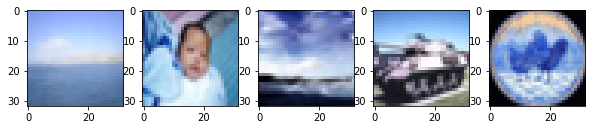

In [13]:
show_result(result)

이미지 파일명을 입력하세요: young_lady_s_000986.png


100%|██████████| 49999/49999 [00:00<00:00, 650843.87it/s]


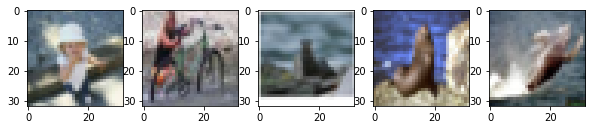

In [15]:
target_histogram = get_target_histogram()
result = search(histogram_db, target_histogram)
show_result(result)